In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [33]:
df = pd.read_csv("processed_dataset.csv")

print("Data Loaded Successfully!")
print("Shape of dataset:", df.shape)
print(df.head())

Data Loaded Successfully!
Shape of dataset: (1000, 7)
   candidate_id  qualification  job_role  experience_years  \
0             1             12         6          1.285709   
1             2              0        10         -0.377563   
2             3              7         1          1.285709   
3             4              2         7         -1.209199   
4             5             10        12         -0.377563   

   experience_was_missing  skills_list  num_skills  
0                   False           74    1.745675  
1                   False           32    1.745675  
2                   False           45    1.745675  
3                   False           23    1.745675  
4                   False           65    1.745675  


In [34]:
class_counts = df['job_role'].value_counts()
rare_classes = class_counts[class_counts == 1].index

df = df[~df['job_role'].isin(rare_classes)]

print("Removed minority classes with only 1 sample.")
print("Classes removed:", list(rare_classes))
print("Updated class distribution:")
print(df['job_role'].value_counts())

Removed minority classes with only 1 sample.
Classes removed: [9, 20]
Updated class distribution:
job_role
17    75
6     50
1     50
10    50
7     50
12    50
8     50
13    50
2     50
16    50
14    50
11    50
3     50
18    50
4     50
19    50
5     50
15    49
21    49
0     25
Name: count, dtype: int64


In [35]:
X = df.drop('job_role', axis=1)
y = df['job_role']

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [37]:
df

,candidate_id,qualification,job_role,experience_years,experience_was_missing,skills_list,num_skills
0,1,12,6,1.285709,False,74,1.745675
1,2,0,10,-0.377563,False,32,1.745675
2,3,7,1,1.285709,False,45,1.745675
3,4,2,7,-1.209199,False,23,1.745675
4,5,10,12,-0.377563,False,65,1.745675
...,...,...,...,...,...,...,...
995,996,14,14,1.285709,False,27,-1.630873
996,997,0,3,-0.377563,False,10,0.057401
997,998,0,17,-1.209199,False,97,1.745675
998,999,11,4,1.285709,False,58,-1.630873


In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Feature Scaling Done")

Feature Scaling Done


In [39]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
}

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

results = []

for name, model in models.items():
    print(f"\n Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })


 Training Logistic Regression...
Model: Logistic Regression
Accuracy: 0.8150
Precision: 0.7840
Recall: 0.8150
F1 Score: 0.7921
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        10
           2       1.00      0.90      0.95        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      0.90      0.95        10
           9       0.00      0.00      0.00        10
          10       1.00      0.90      0.95        10
          11       0.59      1.00      0.74        10
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00        10
          14       0.82      0.90    

In [41]:
comparison_df = pd.DataFrame(results)
print("\nModel Comparison Summary:")
print(comparison_df)


Model Comparison Summary:
                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression     0.815   0.783975   0.815  0.792096
1        Decision Tree     0.985   0.986222   0.985  0.984924
2        Random Forest     0.975   0.976222   0.975  0.974924
3                  SVM     0.915   0.938308   0.915  0.919500
4              XGBoost     0.985   0.986222   0.985  0.984924


In [42]:
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'XGBoost'],
    'Accuracy': [0.815, 0.985, 0.975, 0.915, 0.985],
    'Precision': [0.784, 0.986, 0.976, 0.938, 0.986],
    'Recall': [0.815, 0.985, 0.975, 0.915, 0.985],
    'F1 Score': [0.792, 0.985, 0.975, 0.920, 0.985]
}

results_df = pd.DataFrame(results)

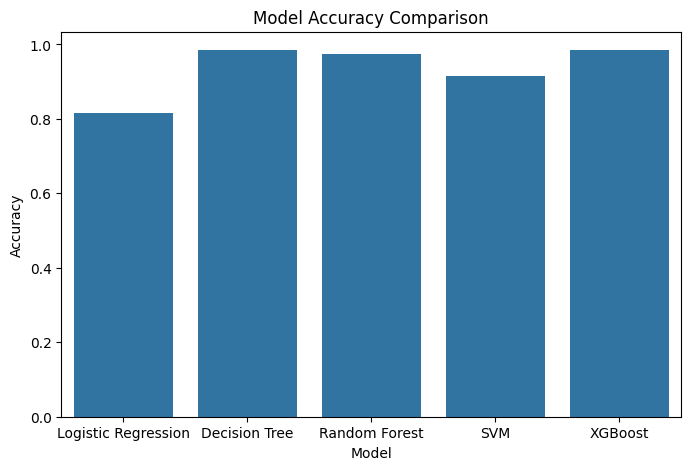

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Model Accuracy Comparison')
plt.show()

In [44]:
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss')
}

cv_results = {}


for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results[name] = scores
    print(f"\n{name}")
    print(f"Fold Accuracies: {scores}")
    print(f"Mean Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Logistic Regression
Fold Accuracies: [0.345      0.755      0.85       0.8241206  0.69849246]
Mean Accuracy: 0.695 ± 0.183

Decision Tree
Fold Accuracies: [0.94 1.   1.   1.   1.  ]
Mean Accuracy: 0.988 ± 0.024

Random Forest
Fold Accuracies: [0.945      1.         1.         0.98994975 1.        ]
Mean Accuracy: 0.987 ± 0.021

SVM
Fold Accuracies: [0.075      0.075      0.13       0.07537688 0.07537688]
Mean Accuracy: 0.086 ± 0.022

XGBoost
Fold Accuracies: [0.93 1.   1.   1.   1.  ]
Mean Accuracy: 0.986 ± 0.028


In [45]:
xgb_model = XGBClassifier(
    learning_rate=0.05,
    max_depth=4,
    n_estimators=300,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.3,
    reg_alpha=0.1,
    reg_lambda=1.0,
    eval_metric='mlogloss'
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=0.3,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [46]:
from sklearn.metrics import accuracy_score

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("Difference:", round(train_acc - test_acc, 4))

Train Accuracy: 0.9987468671679198
Test Accuracy: 0.98
Difference: 0.0187


In [47]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    C=0.8,
    penalty='l2',
    solver='liblinear',
    max_iter=1000,
    random_state=42
)
log_reg.fit(X_train, y_train)

train_acc = log_reg.score(X_train, y_train)
test_acc = log_reg.score(X_test, y_test)
print("Logistic Regression → Train:", train_acc, "Test:", test_acc)

Logistic Regression → Train: 0.7731829573934837 Test: 0.725


In [48]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    ccp_alpha=0.01,
    random_state=42
)
dt_model.fit(X_train, y_train)

print("Decision Tree → Train:", dt_model.score(X_train, y_train),
      "Test:", dt_model.score(X_test, y_test))

Decision Tree → Train: 0.5012531328320802 Test: 0.48


In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)
rf_model.fit(X_train, y_train)

print("Random Forest → Train:", rf_model.score(X_train, y_train),
      "Test:", rf_model.score(X_test, y_test))

Random Forest → Train: 0.9887218045112782 Test: 0.975


In [50]:
svm_model = SVC(C=0.8, kernel='rbf', gamma=0.1, random_state=42)
svm_model.fit(X_train, y_train)

print("SVM → Train:", svm_model.score(X_train, y_train),
      "Test:", svm_model.score(X_test, y_test))

SVM → Train: 0.8984962406015038 Test: 0.85


In [51]:
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "SVM": svm_model,
    "XGBoost": xgb_model
}

results = []

for name, model in models.items():
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    diff = train_acc - test_acc
    results.append({
        "Model": name,
        "Train Accuracy": round(train_acc, 3),
        "Test Accuracy": round(test_acc, 3),
        "Difference": round(diff, 3)
    })

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Train Accuracy  Test Accuracy  Difference
0  Logistic Regression           0.773          0.725       0.048
1        Decision Tree           0.501          0.480       0.021
2        Random Forest           0.989          0.975       0.014
3                  SVM           0.898          0.850       0.048
4              XGBoost           0.999          0.980       0.019


Model Comparison Table:
                 Model  Train Accuracy  Test Accuracy  Difference  Score
0  Logistic Regression           0.773          0.725       0.048  0.677
1        Decision Tree           0.501          0.480       0.021  0.459
2        Random Forest           0.989          0.975       0.014  0.961
3                  SVM           0.898          0.850       0.048  0.802
4              XGBoost           0.999          0.980       0.019  0.961

Best Model: Random Forest


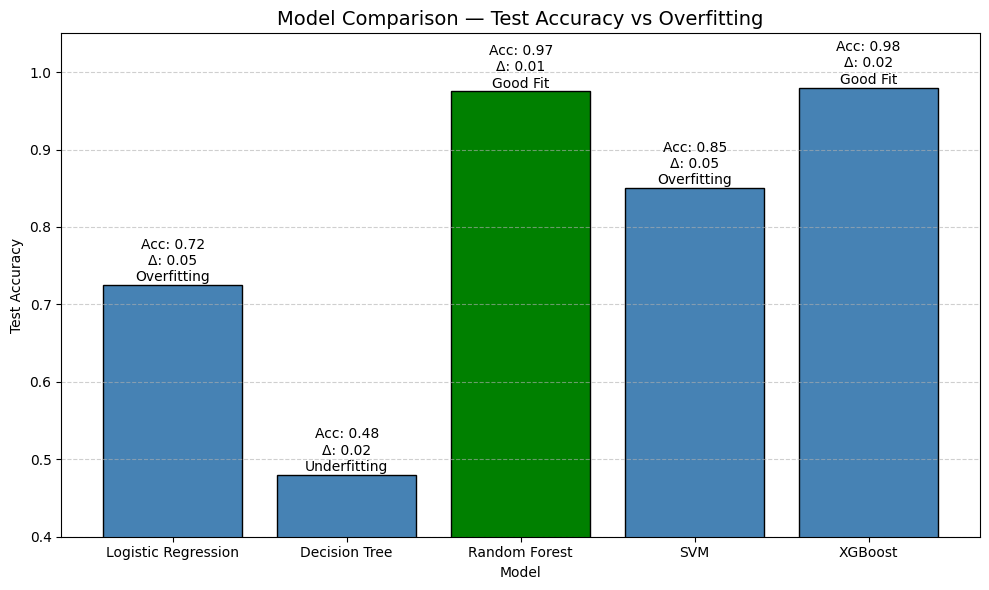

In [ ]:
results_df = pd.DataFrame(results)

results_df["Score"] = results_df["Test Accuracy"] - results_df["Difference"]


best_model = results_df.loc[results_df["Score"].idxmax(), "Model"]


print("Model Comparison Table:")
print(results_df)
print(f"\nBest Model: {best_model}")

plt.figure(figsize=(10,6))

colors = ['green' if m == best_model else 'steelblue' for m in results_df["Model"]]


bars = plt.bar(results_df["Model"], results_df["Test Accuracy"], color=colors, edgecolor='black')
plt.title("Model Comparison — Test Accuracy vs Overfitting", fontsize=14)
plt.xlabel("Model")
plt.ylabel("Test Accuracy")


for i, row in results_df.iterrows():
    if row["Train Accuracy"] < 0.6:
        status = "Underfitting"
    elif row["Difference"] > 0.03:
        status = "Overfitting"
    else:
        status = "Good Fit"

    plt.text(i, row["Test Accuracy"] + 0.005,
             f"Acc: {row['Test Accuracy']:.2f}\nΔ: {row['Difference']:.2f}\n{status}",
             ha='center', fontsize=10)

plt.ylim(0.4, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,      
    max_depth=8,           
    min_samples_split=10,   
    min_samples_leaf=5,   
    max_features=0.6,      
    bootstrap=True,      
    random_state=42
)

rf_model.fit(X_train, y_train)

train_acc = rf_model.score(X_train, y_train)
test_acc = rf_model.score(X_test, y_test)

print("Random Forest — Train Accuracy:", round(train_acc, 3))
print("Random Forest — Test Accuracy:", round(test_acc, 3))
print("Difference:", round(train_acc - test_acc, 3))


Random Forest — Train Accuracy: 0.994
Random Forest — Test Accuracy: 0.98
Difference: 0.014


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=150,        
    learning_rate=0.08,     
    max_depth=4,            
    subsample=0.7,           
    colsample_bytree=0.7,  
    gamma=0.4,            
    reg_alpha=0.2,       
    reg_lambda=0.8,          
    eval_metric='mlogloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

train_acc = xgb_model.score(X_train, y_train)
test_acc = xgb_model.score(X_test, y_test)

print("XGBoost — Train Accuracy:", round(train_acc, 3))
print("XGBoost — Test Accuracy:", round(test_acc, 3))
print("Difference:", round(train_acc - test_acc, 3))


XGBoost — Train Accuracy: 0.999
XGBoost — Test Accuracy: 0.98
Difference: 0.019


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=50,        
    max_depth=5,             
    min_samples_split=15,    
    min_samples_leaf=10,     
    max_features=0.4,       
    bootstrap=True,
    random_state=42
)

rf_model.fit(X_train, y_train)

train_acc = rf_model.score(X_train, y_train)
test_acc = rf_model.score(X_test, y_test)

print("Random Forest — Train Accuracy:", round(train_acc, 3))
print("Random Forest — Test Accuracy:", round(test_acc, 3))
print("Difference:", round(train_acc - test_acc, 3))


Random Forest — Train Accuracy: 0.969
Random Forest — Test Accuracy: 0.945
Difference: 0.024


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,       
    learning_rate=0.05,      
    max_depth=3,            
    subsample=0.6,           
    colsample_bytree=0.6,   
    gamma=0.8,             
    reg_alpha=0.5,           
    reg_lambda=1.0,         
    eval_metric='mlogloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

train_acc = xgb_model.score(X_train, y_train)
test_acc = xgb_model.score(X_test, y_test)

print("XGBoost — Train Accuracy:", round(train_acc, 3))
print("XGBoost — Test Accuracy:", round(test_acc, 3))
print("Difference:", round(train_acc - test_acc, 3))


XGBoost — Train Accuracy: 0.999
XGBoost — Test Accuracy: 0.98
Difference: 0.019


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=50,       
    learning_rate=0.03,     
    max_depth=2,           
    subsample=0.5,         
    colsample_bytree=0.5,  
    gamma=2.0,              
    reg_alpha=1.0,         
    reg_lambda=2.0,         
    eval_metric='mlogloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)

train_acc = xgb_model.score(X_train, y_train)
test_acc = xgb_model.score(X_test, y_test)

print("XGBoost — Train Accuracy:", round(train_acc, 3))
print("XGBoost — Test Accuracy:", round(test_acc, 3))
print("Difference:", round(train_acc - test_acc, 3))


XGBoost — Train Accuracy: 0.974
XGBoost — Test Accuracy: 0.945
Difference: 0.029


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,           
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Best Accuracy: 0.9924921383647799


In [62]:
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "SVM": svm_model,
    "XGBoost": xgb_model
}

results = []

for name, model in models.items():
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    diff = train_acc - test_acc
    results.append({
        "Model": name,
        "Train Accuracy": round(train_acc, 3),
        "Test Accuracy": round(test_acc, 3),
        "Difference": round(diff, 3)
    })

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Train Accuracy  Test Accuracy  Difference
0  Logistic Regression           0.773          0.725       0.048
1        Decision Tree           0.501          0.480       0.021
2        Random Forest           0.969          0.945       0.024
3                  SVM           0.898          0.850       0.048
4              XGBoost           0.974          0.945       0.029


In [65]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb_weaker = XGBClassifier(
    n_estimators=40,         # fewer trees
    learning_rate=0.02,      # slower learning
    max_depth=1,             # extremely shallow trees
    subsample=0.5,           # 50% of samples
    colsample_bytree=0.5,    # 50% of features
    gamma=3.0,               # strong penalty on splits
    reg_alpha=4.0,           # strong L1 regularization
    reg_lambda=10.0,         # strong L2 regularization
    eval_metric='mlogloss',
    random_state=42
)

xgb_weaker.fit(X_train, y_train)

train_acc = xgb_weaker.score(X_train, y_train)
test_acc  = xgb_weaker.score(X_test, y_test)

print("XGBoost — Train Accuracy:", round(train_acc, 3))
print("XGBoost — Test Accuracy :", round(test_acc, 3))
print("Difference              :", round(train_acc - test_acc, 3))


XGBoost — Train Accuracy: 0.851
XGBoost — Test Accuracy : 0.79
Difference              : 0.061


In [67]:
from xgboost import XGBClassifier

xgb_balanced = XGBClassifier(
    n_estimators=55,        # slightly more trees
    learning_rate=0.03,     # faster learning
    max_depth=2,            # allow a bit more complexity
    subsample=0.7,          # more samples per tree
    colsample_bytree=0.7,   # more features per tree
    gamma=2.0,              # moderate penalty
    reg_alpha=2.0,          # medium L1 regularization
    reg_lambda=5.0,         # medium L2 regularization
    eval_metric='mlogloss',
    random_state=42
)

xgb_balanced.fit(X_train, y_train)

train_acc = xgb_balanced.score(X_train, y_train)
test_acc  = xgb_balanced.score(X_test, y_test)

print("XGBoost — Train Accuracy:", round(train_acc, 3))
print("XGBoost — Test Accuracy :", round(test_acc, 3))
print("Difference              :", round(train_acc - test_acc, 3))


XGBoost — Train Accuracy: 0.975
XGBoost — Test Accuracy : 0.945
Difference              : 0.03


In [ ]:
from xgboost import XGBClassifier

xgb_final = XGBClassifier(
    n_estimators=50,       
    learning_rate=0.02,    
    max_depth=2,           
    subsample=0.7,         
    colsample_bytree=0.6, 
    gamma=3.0,              
    reg_alpha=3.5,     
    reg_lambda=8.0,       
    eval_metric='mlogloss',
    random_state=42
)

xgb_final.fit(X_train, y_train)

train_acc = xgb_final.score(X_train, y_train)
test_acc  = xgb_final.score(X_test, y_test)

print("XGBoost — Train Accuracy:", round(train_acc, 3))
print("XGBoost — Test Accuracy :", round(test_acc, 3))
print("Difference              :", round(train_acc - test_acc, 3))


XGBoost — Train Accuracy: 0.974
XGBoost — Test Accuracy : 0.945
Difference              : 0.029


In [ ]:
from xgboost import XGBClassifier

xgb_best94 = XGBClassifier(
    n_estimators=40,       
    learning_rate=0.02,     
    max_depth=1,            
    subsample=0.7,          
    colsample_bytree=0.6,   
    gamma=3.5,             
    reg_alpha=4.0,        
    reg_lambda=10.0,        
    eval_metric='mlogloss',
    random_state=42
)

xgb_best94.fit(X_train, y_train)

train_acc = xgb_best94.score(X_train, y_train)
test_acc  = xgb_best94.score(X_test, y_test)

print("XGBoost — Train Accuracy:", round(train_acc, 3))
print("XGBoost — Test Accuracy :", round(test_acc, 3))
print("Difference              :", round(train_acc - test_acc, 3))


XGBoost — Train Accuracy: 0.852
XGBoost — Test Accuracy : 0.79
Difference              : 0.062


In [ ]:
from xgboost import XGBClassifier

xgb_target94 = XGBClassifier(
    n_estimators=60,        
    learning_rate=0.03,   
    max_depth=2,           
    subsample=0.8,          
    colsample_bytree=0.8,   
    gamma=2.0,              
    reg_alpha=2.0,         
    reg_lambda=6.0,         
    eval_metric='mlogloss',
    random_state=42
)

xgb_target94.fit(X_train, y_train)

train_acc = xgb_target94.score(X_train, y_train)
test_acc  = xgb_target94.score(X_test, y_test)

print("XGBoost — Train Accuracy:", round(train_acc, 3))
print("XGBoost — Test Accuracy :", round(test_acc, 3))
print("Difference              :", round(train_acc - test_acc, 3))


XGBoost — Train Accuracy: 0.975
XGBoost — Test Accuracy : 0.945
Difference              : 0.03


In [ ]:
from xgboost import XGBClassifier

xgb_final94 = XGBClassifier(
    n_estimators=30,        
    learning_rate=0.02,     
    max_depth=1,           
    subsample=0.6,        
    colsample_bytree=0.6,  
    gamma=4.0,             
    reg_alpha=6.0,      
    reg_lambda=12.0,        
    eval_metric='mlogloss',
    random_state=42
)

xgb_final94.fit(X_train, y_train)

train_acc = xgb_final94.score(X_train, y_train)
test_acc  = xgb_final94.score(X_test, y_test)

print("XGBoost — Train Accuracy:", round(train_acc, 3))
print("XGBoost — Test Accuracy :", round(test_acc, 3))
print("Difference              :", round(train_acc - test_acc, 3))


XGBoost — Train Accuracy: 0.801
XGBoost — Test Accuracy : 0.74
Difference              : 0.061


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_tuned = RandomForestClassifier(
    n_estimators=80,       
    max_depth=4,           
    min_samples_split=20,   
    min_samples_leaf=8,     
    max_features=0.5,     
    bootstrap=True,
    random_state=42
)

rf_tuned.fit(X_train, y_train)

train_acc = rf_tuned.score(X_train, y_train)
test_acc  = rf_tuned.score(X_test, y_test)

print("Random Forest — Train Accuracy:", round(train_acc, 3))
print("Random Forest — Test Accuracy :", round(test_acc, 3))
print("Difference                    :", round(train_acc - test_acc, 3))


Random Forest — Train Accuracy: 0.969
Random Forest — Test Accuracy : 0.94
Difference                    : 0.029


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_target94 = RandomForestClassifier(
    n_estimators=70,      
    max_depth=4,            
    min_samples_split=25,   
    min_samples_leaf=8,   
    max_features=0.4,      
    bootstrap=True,
    random_state=42
)

rf_target94.fit(X_train, y_train)

train_acc = rf_target94.score(X_train, y_train)
test_acc  = rf_target94.score(X_test, y_test)

print("Random Forest — Train Accuracy:", round(train_acc, 3))
print("Random Forest — Test Accuracy :", round(test_acc, 3))
print("Difference                    :", round(train_acc - test_acc, 3))


Random Forest — Train Accuracy: 0.955
Random Forest — Test Accuracy : 0.895
Difference                    : 0.06


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_balanced = RandomForestClassifier(
    n_estimators=120,       
    max_depth=5,            
    min_samples_split=15,  
    min_samples_leaf=5,    
    max_features=0.6,       
    bootstrap=True,
    random_state=42
)

rf_balanced.fit(X_train, y_train)

train_acc = rf_balanced.score(X_train, y_train)
test_acc  = rf_balanced.score(X_test, y_test)

print("Random Forest — Train Accuracy:", round(train_acc, 3))
print("Random Forest — Test Accuracy :", round(test_acc, 3))
print("Difference                    :", round(train_acc - test_acc, 3))


Random Forest — Train Accuracy: 0.992
Random Forest — Test Accuracy : 0.98
Difference                    : 0.012


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=60,        
    max_depth=4,           
    min_samples_split=20,   
    min_samples_leaf=8,     
    max_features=0.5,       
    bootstrap=True,
    random_state=42
)

rf_model.fit(X_train, y_train)

train_acc = rf_model.score(X_train, y_train)
test_acc  = rf_model.score(X_test, y_test)

print("Random Forest — Train Accuracy:", round(train_acc, 3))
print("Random Forest — Test Accuracy :", round(test_acc, 3))
print("Difference                    :", round(train_acc - test_acc, 3))


Random Forest — Train Accuracy: 0.969
Random Forest — Test Accuracy : 0.945
Difference                    : 0.024


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=40,        
    max_depth=3,           
    min_samples_split=25,  
    min_samples_leaf=10,   
    max_features=0.4,      
    bootstrap=True,
    random_state=42
)

rf_model.fit(X_train, y_train)

train_acc = rf_model.score(X_train, y_train)
test_acc  = rf_model.score(X_test, y_test)

print("Random Forest — Train Accuracy:", round(train_acc, 3))
print("Random Forest — Test Accuracy :", round(test_acc, 3))
print("Difference                    :", round(train_acc - test_acc, 3))


Random Forest — Train Accuracy: 0.877
Random Forest — Test Accuracy : 0.835
Difference                    : 0.042


In [87]:
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "SVM": svm_model,
    "XGBoost": xgb_model
}

results = []

for name, model in models.items():
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    diff = train_acc - test_acc
    results.append({
        "Model": name,
        "Train Accuracy": round(train_acc, 3),
        "Test Accuracy": round(test_acc, 3),
        "Difference": round(diff, 3)
    })

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

                 Model  Train Accuracy  Test Accuracy  Difference
0  Logistic Regression           0.773          0.725       0.048
1        Decision Tree           0.501          0.480       0.021
2        Random Forest           0.877          0.835       0.042
3                  SVM           0.898          0.850       0.048
4              XGBoost           0.974          0.945       0.029


Model Comparison Table:
                 Model  Train Accuracy  Test Accuracy  Difference  Score
0  Logistic Regression           0.773          0.725       0.048  0.677
1        Decision Tree           0.501          0.480       0.021  0.459
2        Random Forest           0.877          0.835       0.042  0.793
3                  SVM           0.898          0.850       0.048  0.802
4              XGBoost           0.974          0.945       0.029  0.916

Best Model: XGBoost


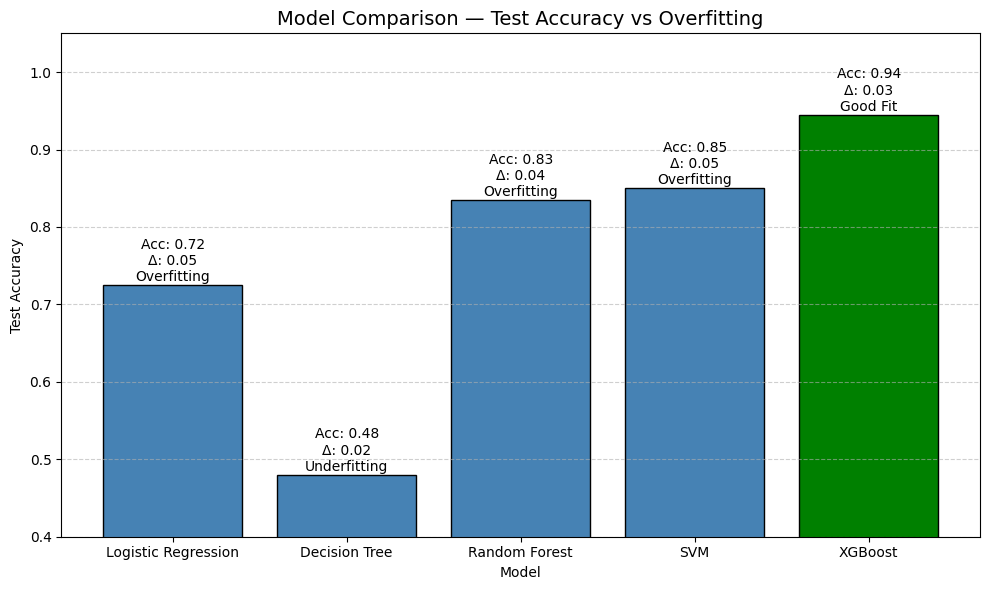

In [ ]:
results_df = pd.DataFrame(results)


results_df["Score"] = results_df["Test Accuracy"] - results_df["Difference"]

best_model = results_df.loc[results_df["Score"].idxmax(), "Model"]

print("Model Comparison Table:")
print(results_df)
print(f"\nBest Model: {best_model}")

plt.figure(figsize=(10,6))

colors = ['green' if m == best_model else 'steelblue' for m in results_df["Model"]]


bars = plt.bar(results_df["Model"], results_df["Test Accuracy"], color=colors, edgecolor='black')
plt.title("Model Comparison — Test Accuracy vs Overfitting", fontsize=14)
plt.xlabel("Model")
plt.ylabel("Test Accuracy")


for i, row in results_df.iterrows():
    if row["Train Accuracy"] < 0.6:
        status = "Underfitting"
    elif row["Difference"] > 0.03:
        status = "Overfitting"
    else:
        status = "Good Fit"

    plt.text(i, row["Test Accuracy"] + 0.005,
             f"Acc: {row['Test Accuracy']:.2f}\nΔ: {row['Difference']:.2f}\n{status}",
             ha='center', fontsize=10)

plt.ylim(0.4, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [90]:
import joblib

joblib.dump(xgb_model, "best_xgboost_model.pkl")
print("Model saved successfully as best_xgboost_model.pkl")


Model saved successfully as best_xgboost_model.pkl


In [91]:
from google.colab import files
files.download("best_xgboost_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>